## Exercise 02 : Bar

In [ ]:
import pandas as pd
import sqlite3
con=sqlite3.connect('data/checking-logs.sqlite')
main_query = """
WITH hours AS(
    SELECT uid,
    timestamp AS date,
    CAST(strftime('%H', timestamp) AS INTEGER) AS time
    FROM checker
        WHERE uid LIKE "user_%"
)
SELECT DATE(date) AS date,
        SUM(CASE WHEN time>0 AND time<4 THEN 1 ELSE 0 END) AS night,
        SUM(CASE WHEN time>=4 AND time<10 THEN 1 ELSE 0 END) AS 'morning',
        SUM(CASE WHEN time>=10 AND time<17 THEN 1 ELSE 0 END) AS 'afternoon', 
        SUM(CASE WHEN time>=17 AND time<24 THEN 1 ELSE 0 END) AS 'evening' 
FROM hours
GROUP BY DATE(date)
"""

df=pd.read_sql(main_query, con, parse_dates=['date'])
df=df.set_index('date')
df

,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,33,35
2020-04-19,0,4,16,11
2020-04-20,0,0,12,13
2020-04-21,0,0,0,25
2020-04-22,0,0,4,24
2020-04-23,0,6,15,20
2020-04-24,0,0,4,12
2020-04-25,1,21,33,49


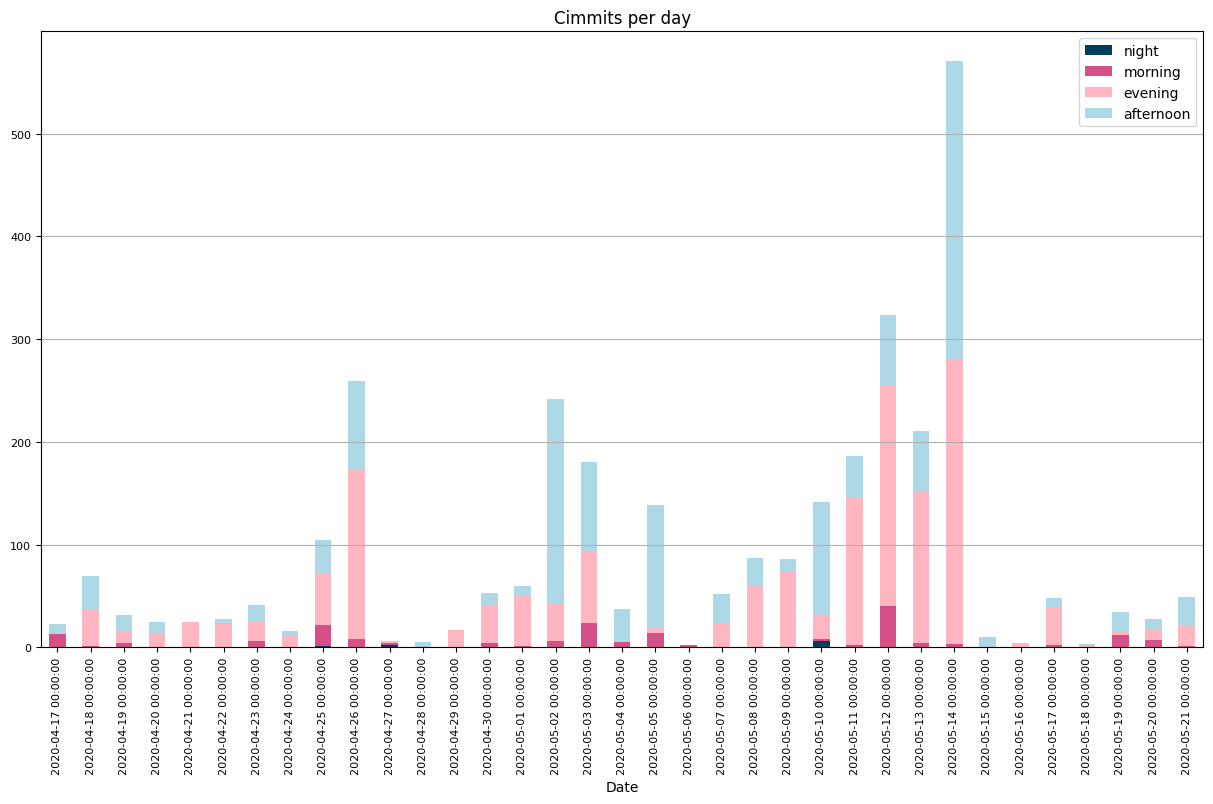

In [69]:
df_in_bar=df.plot(
    fontsize=8,
    figsize=(15,8),
    kind='bar',
    y=['night', 'morning', 'evening', 'afternoon'],
    stacked=True,
    rot=90,
    color=['#003f5c', '#d45087', 'lightpink', 'lightblue'],
)
df_in_bar.set_title('Cimmits per day')
df_in_bar.set_xlabel('Date')
df_in_bar.grid(axis='y')

* “When do our users usually commit the labs: in the night, morning, afternoon,
  or evening?”, the answer is the two most common periods.

AFTERNOON EVENING

* Which day has:
    * the most number of commits
    * and at the same time, the number of commits in the evening is higher than in the afternoon?

    2020.05.12

In [ ]:
con.close()